In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# api_key = 
urls = ['https://api.census.gov/data/2018/abscs?get=GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,VET_GROUP,VET_GROUP_LABEL,EMPSZFI,EMPSZFI_LABEL,YEAR,FIRMPDEMP,FIRMPDEMP_F,RCPPDEMP,RCPPDEMP_F,EMP,EMP_F,PAYANN,PAYANN_F,FIRMPDEMP_S,FIRMPDEMP_S_F,RCPPDEMP_S,RCPPDEMP_S_F,EMP_S,EMP_S_F,PAYANN_S,PAYANN_S_F&for=us:*']

In [3]:
def getDF(url):
    response = requests.get(url).json()
    labels = response[0]
    rows = response[1:]
    df = pd.DataFrame(rows,columns=labels)
    return df

In [4]:
company_summary = getDF(urls[0])
# char_business = getDF(urls[1])
# char_owners = getDF(urls[2])
# technology_char = getDF(urls[3])

In [5]:
# selected_rows = company_summary.loc[8000:]
# selected_rows.head()
# company_summary.shape
company_summary_table = company_summary[['GEO_ID','SEX_LABEL','ETH_GROUP_LABEL','RACE_GROUP_LABEL','EMPSZFI_LABEL','YEAR']].copy()

In [114]:
company_summary_table.head()

,GEO_ID,SEX_LABEL,ETH_GROUP_LABEL,RACE_GROUP_LABEL,EMPSZFI_LABEL,YEAR
0,0100000US,Female,Hispanic,Total,All firms,2018
1,0100000US,Female,Hispanic,Total,Firms with no employees,2018
2,0100000US,Female,Hispanic,Total,Firms with 1 to 4 employees,2018
3,0100000US,Female,Hispanic,Total,Firms with 5 to 9 employees,2018
4,0100000US,Female,Hispanic,Total,Firms with 10 to 19 employees,2018


In [ ]:
df_sex = company_summary.groupby(['SEX_LABEL', 'EMPSZFI_LABEL']).count()["GEO_ID"]
print(df_sex)

In [116]:
df_sex_both = df_sex.loc['Female':'Male']

In [ ]:
print(df_sex_both)

In [118]:
df_sex_female = df_sex['Female']
df_sex_male = df_sex['Male']

<function matplotlib.pyplot.show(close=None, block=None)>

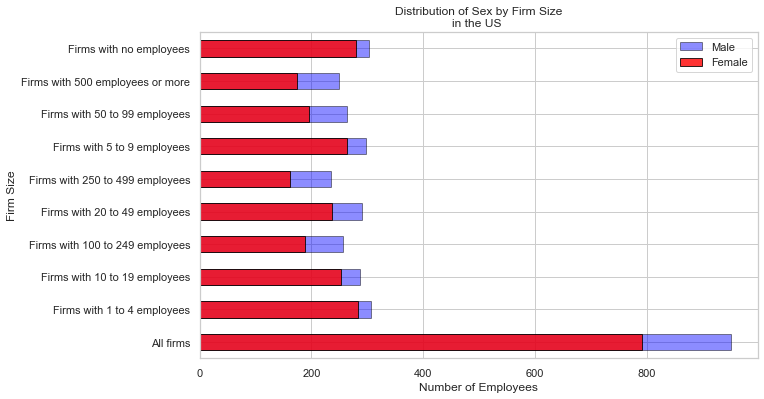

In [135]:
ax2 = plt.subplots(figsize = (10,6))


ax2 = df_sex_male.plot(kind='barh', x='EMPSZFI_LABEL', color = 'blue', alpha = .45 , edgecolor = 'black')
ax2 = df_sex_female.plot(kind='barh', x='EMPSZFI_LABEL', color = 'red', alpha = .80 , edgecolor = 'black')

ax2.set(title = 'Distribution of Sex by Firm Size\nin the US ', xlabel ='Number of Employees', ylabel = 'Firm Size')
ax2 = plt.legend(['Male','Female'])

sns.set_theme(style='whitegrid')
plt.show

In [12]:
df = company_summary_table.groupby(['EMPSZFI_LABEL']).count()['GEO_ID']
print(df)

EMPSZFI_LABEL
All firms                           4271
Firms with 1 to 4 employees         2041
Firms with 10 to 19 employees       1823
Firms with 100 to 249 employees     1452
Firms with 20 to 49 employees       1761
Firms with 250 to 499 employees     1287
Firms with 5 to 9 employees         1913
Firms with 50 to 99 employees       1545
Firms with 500 employees or more    1369
Firms with no employees             1996
Name: GEO_ID, dtype: int64


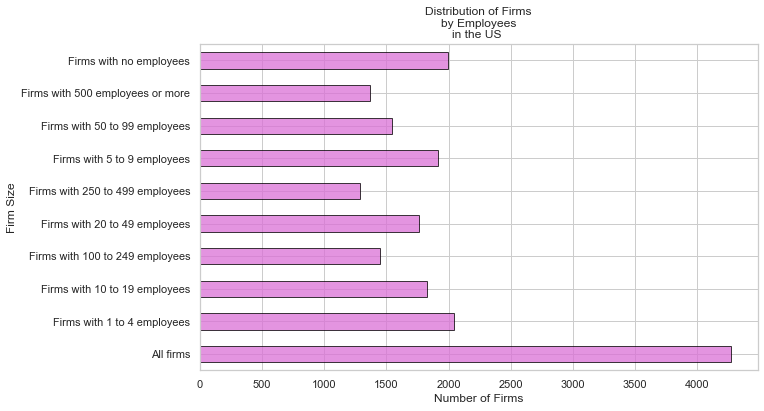

In [134]:

fig, ax = plt.subplots(figsize = (10,6))

ax = df.plot(title = 'Distribution of Firms\nby Employees\nin the US ', kind='barh', x='EMPSZFI_LABEL', color = 'orchid', alpha = .75 , edgecolor = 'black')
ax.set_ylabel('Firm Size')
ax.set_xlabel('Number of Firms')
sns.set_theme(style='whitegrid')

In [120]:
df_eth = company_summary.groupby(['ETH_GROUP_LABEL', 'EMPSZFI_LABEL']).count()["GEO_ID"]
print(df_eth)

ETH_GROUP_LABEL                EMPSZFI_LABEL                   
Classifiable                   All firms                             21
                               Firms with 1 to 4 employees           21
                               Firms with 10 to 19 employees         21
                               Firms with 100 to 249 employees       21
                               Firms with 20 to 49 employees         21
                               Firms with 250 to 499 employees       21
                               Firms with 5 to 9 employees           21
                               Firms with 50 to 99 employees         21
                               Firms with 500 employees or more      21
                               Firms with no employees               21
Equally Hispanic/non-Hispanic  All firms                            442
                               Firms with 1 to 4 employees          161
                               Firms with 10 to 19 employees        127


In [122]:
df_eth_all = df_eth.loc['Hispanic':'Total']

In [123]:
print(df_eth_all)

ETH_GROUP_LABEL  EMPSZFI_LABEL                   
Hispanic         All firms                            740
                 Firms with 1 to 4 employees          218
                 Firms with 10 to 19 employees        188
                 Firms with 100 to 249 employees      122
                 Firms with 20 to 49 employees        170
                 Firms with 250 to 499 employees       98
                 Firms with 5 to 9 employees          201
                 Firms with 50 to 99 employees        151
                 Firms with 500 employees or more     119
                 Firms with no employees              220
Non-Hispanic     All firms                            993
                 Firms with 1 to 4 employees          248
                 Firms with 10 to 19 employees        241
                 Firms with 100 to 249 employees      222
                 Firms with 20 to 49 employees        239
                 Firms with 250 to 499 employees      208
                 Firms

In [136]:
df_eth_his = df_eth_all.loc['Hispanic']

In [137]:
df_eth_non = df_eth_all.loc['Non-Hispanic']

In [138]:
df_eth_total = df_eth_all.loc['Total']

<function matplotlib.pyplot.show(close=None, block=None)>

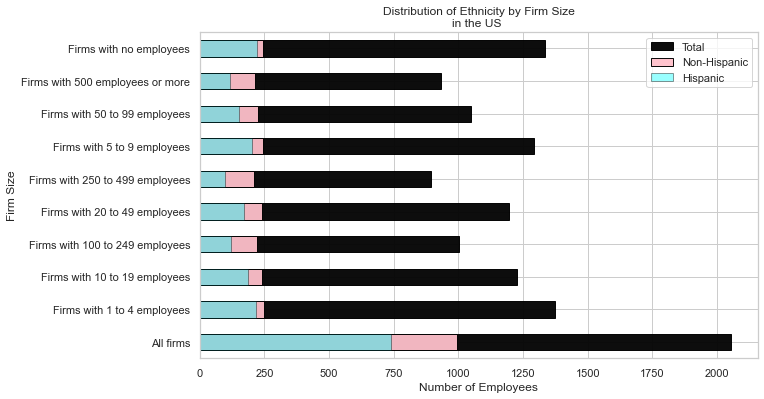

In [143]:
ax3 = plt.subplots(figsize = (10,6))

ax3 = df_eth_total.plot(kind='barh', x='EMPSZFI_LABEL', color = 'black', alpha = .95 , edgecolor = 'black')
ax3 = df_eth_non.plot(kind='barh', x='EMPSZFI_LABEL', color = 'pink', alpha = .95 , edgecolor = 'black')
ax3 = df_eth_his.plot(kind='barh', x='EMPSZFI_LABEL', color = 'aqua', alpha = .40 , edgecolor = 'black')

ax3.set(title = 'Distribution of Ethnicity by Firm Size\nin the US ', xlabel ='Number of Employees', ylabel = 'Firm Size')
ax3 = plt.legend(['Total','Non-Hispanic','Hispanic'])

sns.set_theme(style='whitegrid')
plt.show